# Gradient Descent

Examples of Gradient Descent and how it works.

## Imports and Packages

In [9]:
import matplotlib.pyplot as plt
import numpy as np

## Example 1 - Simple Cost Function
$$f(x) = x^2 + x + 1$$

In [10]:
def f(x) :
    return x**2 +  x + 1

Create a data array containing 500 points between -3 and 3 using the Numpy `linspace()` function.

In [11]:
x = np.linspace(start=-3, stop=3, num=500)

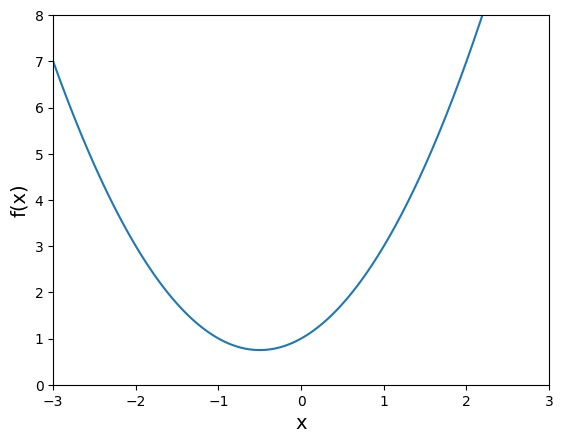

In [12]:
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.plot(x, f(x))
plt.show()